- OpenClassrooms Project 7, Data Scientist
- Author : Oumeima EL GHARBI
- Date : November and December 2022, January and February 2023

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

# to compute time of pipeline
from time import time, strftime, gmtime

import os
from os import listdir
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from graphs_eda import *

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
import sys
print("Python version {}.{}.{}".format(str(sys.version_info[0]), str(sys.version_info[1]), str(sys.version_info[2])))

Python version 3.10.9


In [3]:
# Create local directories to save data
os.makedirs("dataset/cleaned", exist_ok=True)

In [4]:
# Starting time
t0 = time()

input_path = "./dataset/source/"
output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

### Importing all datasets

We read the folder in which we have all the csv files.

In [5]:
all_files = [f for f in listdir(input_path) if isfile(join(input_path, f))]

all_csv_files = [file for file in all_files if file.endswith(".csv")]
print(all_files, end='\n\n')

print(all_csv_files)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
all_datasets = []

for index, dataset_csv in enumerate(all_csv_files):
    name = dataset_csv.split(".")[0]
    #if name.startswith("olist"):
     #   list_name = name.split("_")[1:-1]
      #  name = "_".join(list_name)
    # we make the dataset as a global variable so we can use it later in the notebook
    globals()["dataset_" + name] = load_data(input_path, dataset_csv)

    # we add the dataset to the list of all datasets.
    #all_datasets.append(globals()["dataset_" + name])

    print("This is the dataset n°{} : {}".format(index + 1, name))
    df = globals()["dataset_" + name]
    all_datasets.append(("dataset_" + name, df))
    display(df.head(2))
    display(df.info(verbose=True))

___Loading raw dataset___
Initial shape : (48744, 121)
This is the dataset n°1 : application_test


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

None

___Loading raw dataset___
Initial shape : (307511, 122)
This is the dataset n°2 : application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

None

___Loading raw dataset___
Initial shape : (1716428, 17)
This is the dataset n°3 : bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None

___Loading raw dataset___
Initial shape : (27299925, 3)
This is the dataset n°4 : bureau_balance


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

___Loading raw dataset___
Initial shape : (3840312, 23)
This is the dataset n°5 : credit_card_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

None

___Loading raw dataset___
Initial shape : (13605401, 8)
This is the dataset n°6 : installments_payments


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None

___Loading raw dataset___
Initial shape : (10001358, 8)
This is the dataset n°7 : POS_CASH_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None

___Loading raw dataset___
Initial shape : (1670214, 37)
This is the dataset n°8 : previous_application


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

None

___Loading raw dataset___
Initial shape : (48744, 2)
This is the dataset n°9 : sample_submission


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


None

### 1) Statistics about shape and missing data

For each dataset, we display its dimension and if it has missing values (NaN)

##### Shape statistics

In [7]:
print("Shape dataset")
for tuple_df in all_datasets :
    print("The dataset called :", tuple_df[0], "has a shape :", tuple_df[1].shape)

Shape dataset
The dataset called : dataset_application_test has a shape : (48744, 121)
The dataset called : dataset_application_train has a shape : (307511, 122)
The dataset called : dataset_bureau has a shape : (1716428, 17)
The dataset called : dataset_bureau_balance has a shape : (27299925, 3)
The dataset called : dataset_credit_card_balance has a shape : (3840312, 23)
The dataset called : dataset_installments_payments has a shape : (13605401, 8)
The dataset called : dataset_POS_CASH_balance has a shape : (10001358, 8)
The dataset called : dataset_previous_application has a shape : (1670214, 37)
The dataset called : dataset_sample_submission has a shape : (48744, 2)


##### Missing data statistics

In [8]:
print("Missing values")
for tuple_df in all_datasets :
    df = tuple_df[1]
    print("The dataset called :", tuple_df[0], "has :", round(df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100), "% of missing values.")

Missing values
The dataset called : dataset_application_test has : 24 % of missing values.
The dataset called : dataset_application_train has : 24 % of missing values.
The dataset called : dataset_bureau has : 14 % of missing values.
The dataset called : dataset_bureau_balance has : 0 % of missing values.
The dataset called : dataset_credit_card_balance has : 7 % of missing values.
The dataset called : dataset_installments_payments has : 0 % of missing values.
The dataset called : dataset_POS_CASH_balance has : 0 % of missing values.
The dataset called : dataset_previous_application has : 18 % of missing values.
The dataset called : dataset_sample_submission has : 0 % of missing values.


In [9]:
#dataset_application_train.isna().sum(axis=0)

print("Missing values statistics")
for tuple_df in all_datasets :
    df = tuple_df[1]
    print("Dataset :", tuple_df[0])
    df_missing_data = missing_data(df)
    display(df_missing_data)

Missing values statistics
Dataset : dataset_application_test


,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


Dataset : dataset_application_train


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


Dataset : dataset_bureau


,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


Dataset : dataset_bureau_balance


,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


Dataset : dataset_credit_card_balance


,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


Dataset : dataset_installments_payments


,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


Dataset : dataset_POS_CASH_balance


,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


Dataset : dataset_previous_application


,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


Dataset : dataset_sample_submission


,Total,Percent
SK_ID_CURR,0,0.0
TARGET,0,0.0


##### Duplicated data statistics

In [10]:
print("Duplicated rows ?")
for tuple_df in all_datasets:
    print("The dataset called :", tuple_df[0], "has :",tuple_df[1].duplicated().sum(), "duplicated rows.")

Duplicated rows ?
The dataset called : dataset_application_test has : 0 duplicated rows.
The dataset called : dataset_application_train has : 0 duplicated rows.
The dataset called : dataset_bureau has : 0 duplicated rows.
The dataset called : dataset_bureau_balance has : 0 duplicated rows.
The dataset called : dataset_credit_card_balance has : 0 duplicated rows.
The dataset called : dataset_installments_payments has : 0 duplicated rows.
The dataset called : dataset_POS_CASH_balance has : 0 duplicated rows.
The dataset called : dataset_previous_application has : 0 duplicated rows.
The dataset called : dataset_sample_submission has : 0 duplicated rows.


### 2)  Distribution of the target

<AxesSubplot:ylabel='TARGET'>

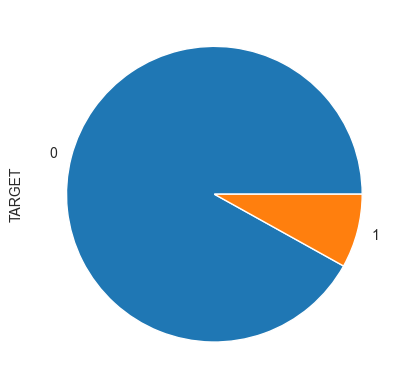

In [11]:
dataset_application_train.TARGET.value_counts(normalize=True).plot(kind="pie")

In [12]:
dataset_application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In this project, we are trying to predict the most accurately possible the class 1 which represents clients that are default risk.
We want to predict if a client has a risk of not paying back its loan to the bank.
- The class 0 represents clients that are not default risk client. This means, they are clients that repaid their loan.
- The class 1 represents clients that are default risk which means they are clients that didn't repay their loan.


### 3) Exploring the data

#### 1) Application loan (application_train dataset)

Loan types


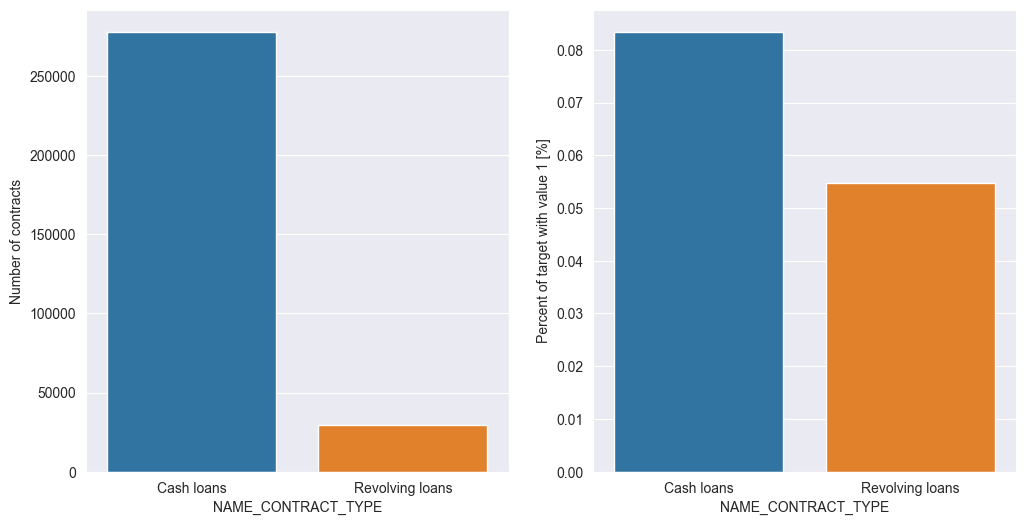

In [13]:
print("Loan types")
plot_stats(dataset_application_train, 'NAME_CONTRACT_TYPE')

Client gender


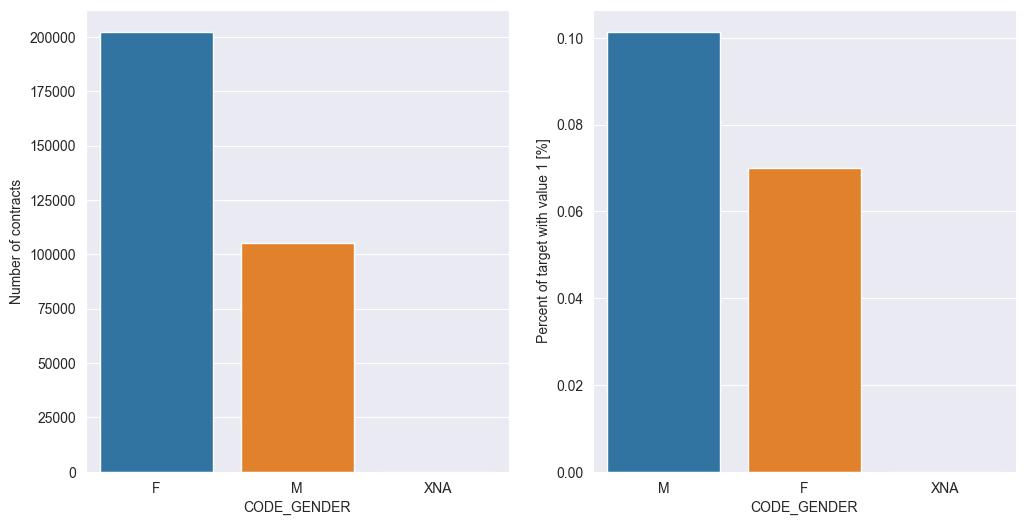

In [14]:
print("Client gender")
plot_stats(dataset_application_train, 'CODE_GENDER')

Flag own car and flag own real estate


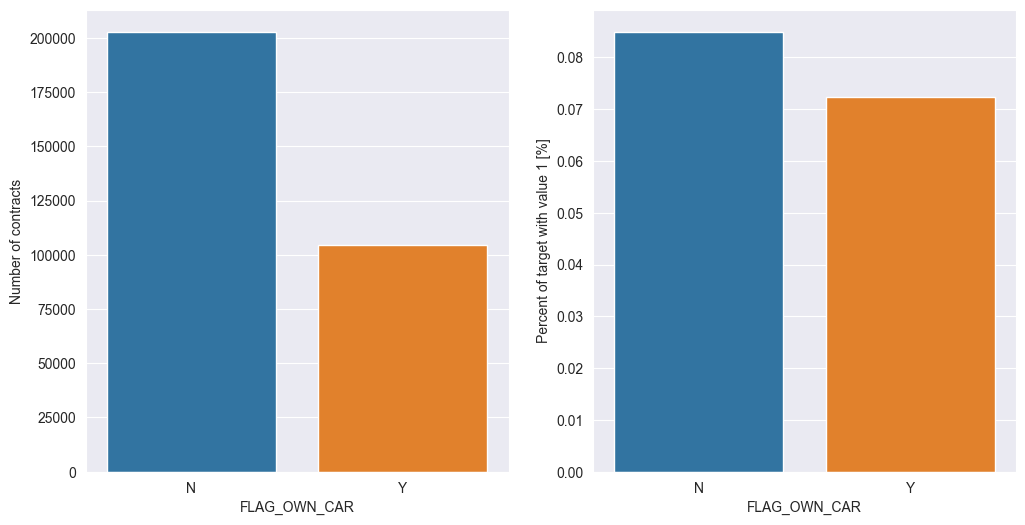

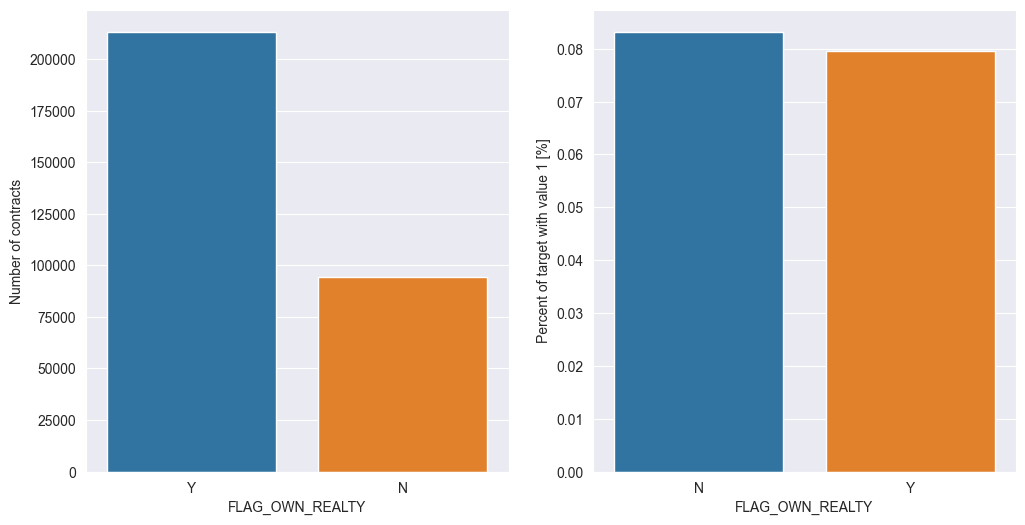

In [15]:
print("Flag own car and flag own real estate")
plot_stats(dataset_application_train, 'FLAG_OWN_CAR')
plot_stats(dataset_application_train, 'FLAG_OWN_REALTY')

Family status of the client


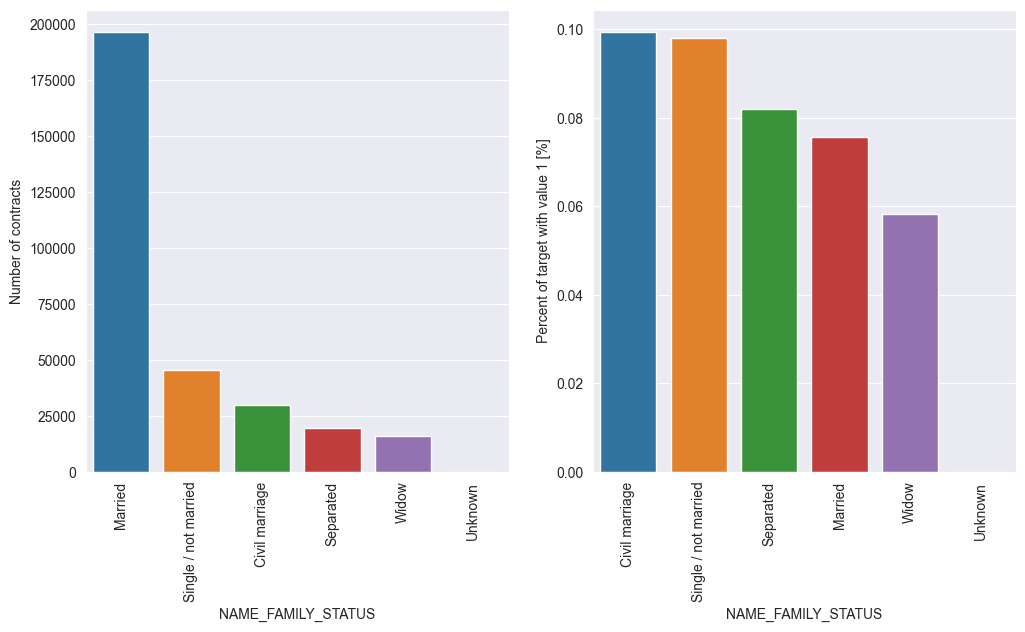

In [16]:
print("Family status of the client")
plot_stats(dataset_application_train, 'NAME_FAMILY_STATUS',True, True)

Number of children


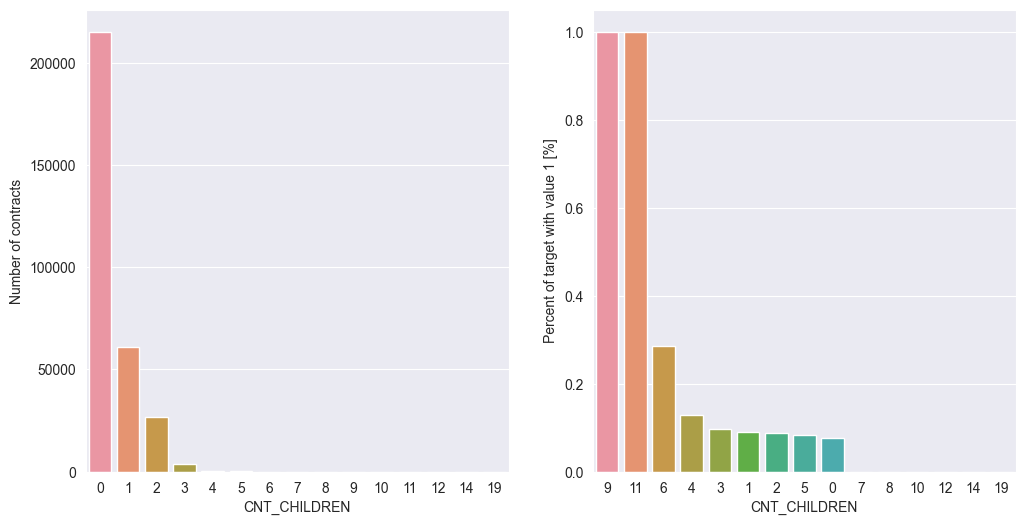

In [17]:
print("Number of children")
plot_stats(dataset_application_train, 'CNT_CHILDREN')

Number of family members of client


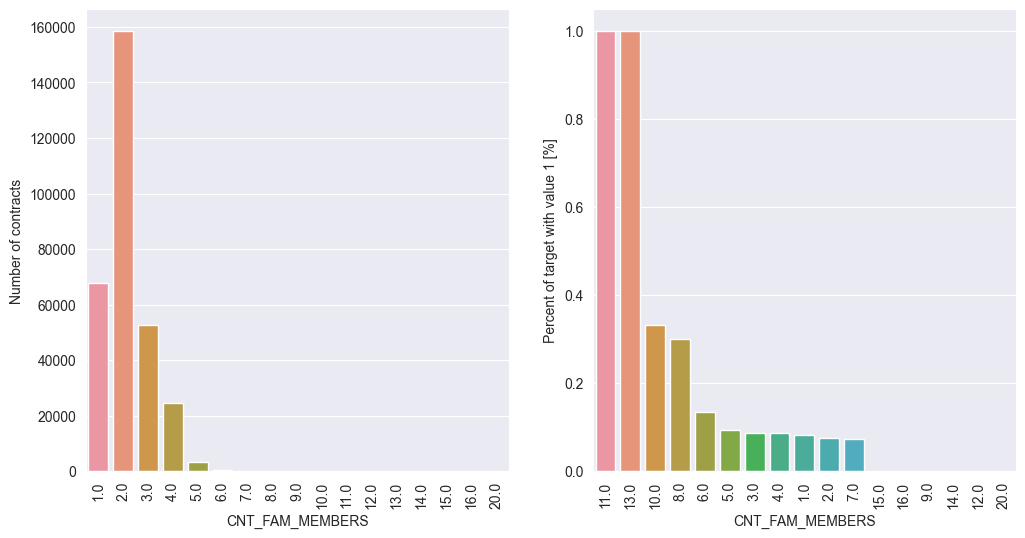

In [18]:
print("Number of family members of client")
plot_stats(dataset_application_train, 'CNT_FAM_MEMBERS',True)

Income type of client


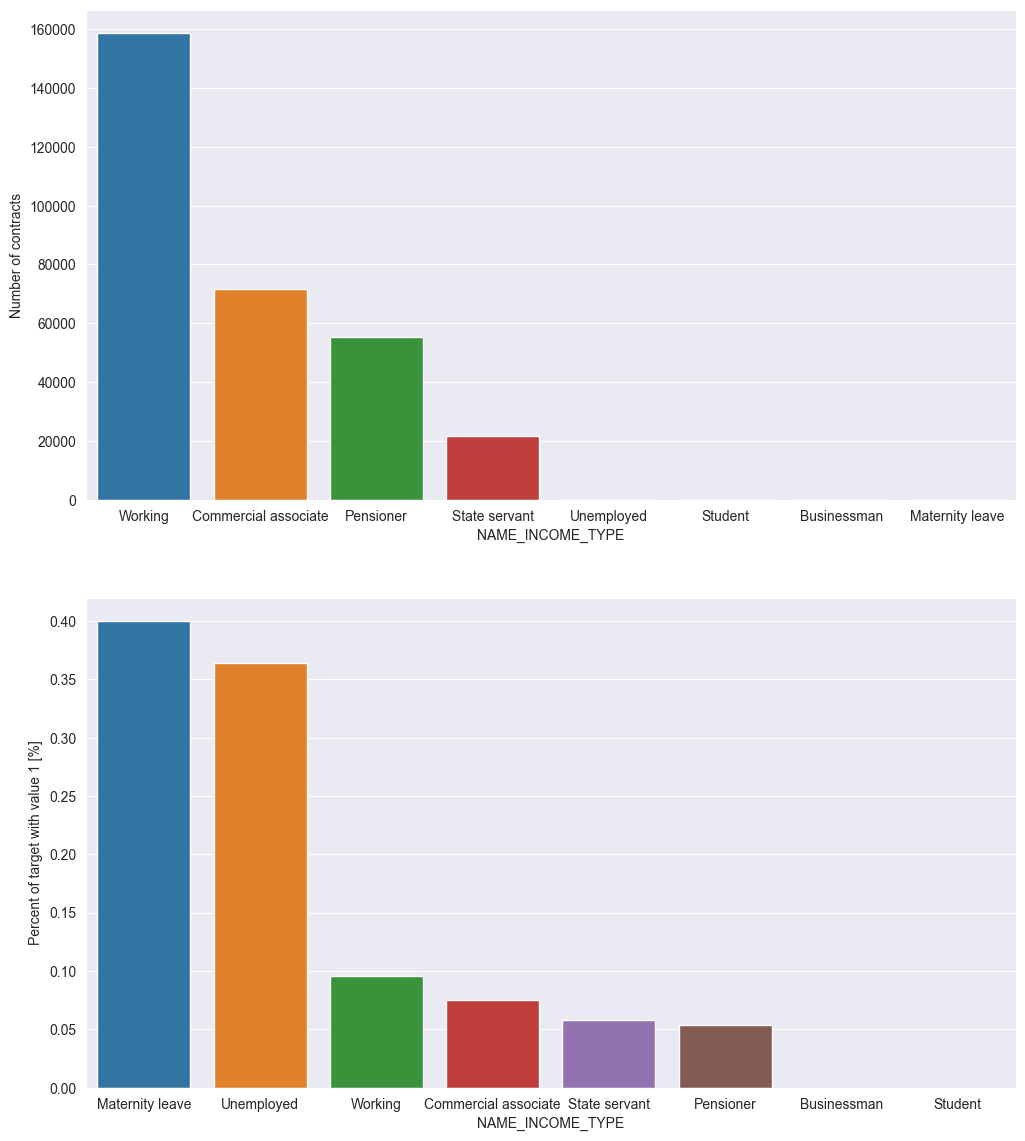

In [19]:
print("Income type of client")
plot_stats(dataset_application_train, 'NAME_INCOME_TYPE',False,False)

Ocupation of client


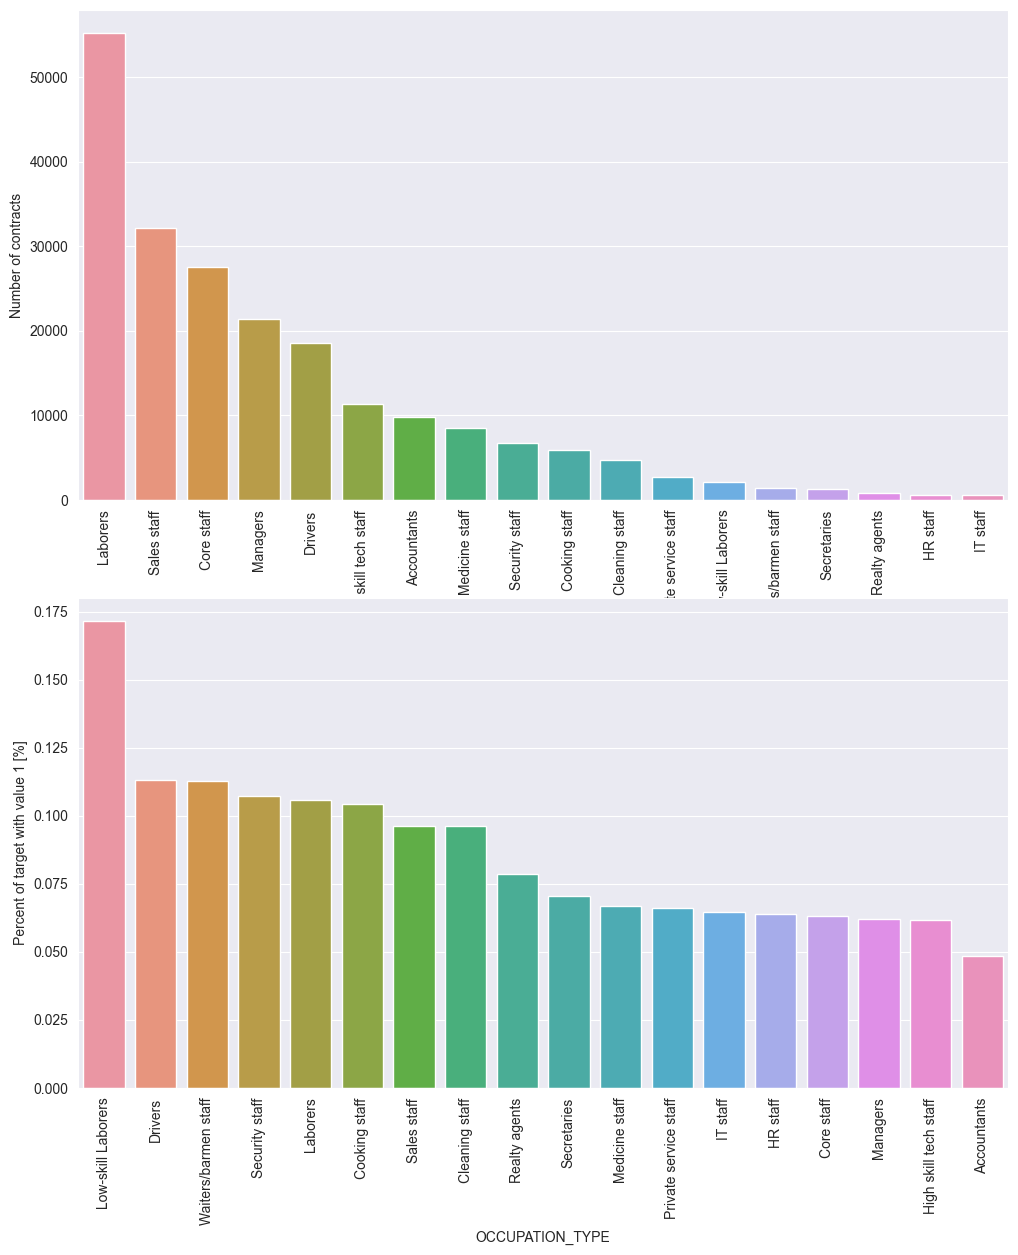

In [20]:
print("Ocupation of client")
plot_stats(dataset_application_train, 'OCCUPATION_TYPE',True, False)

Organization type


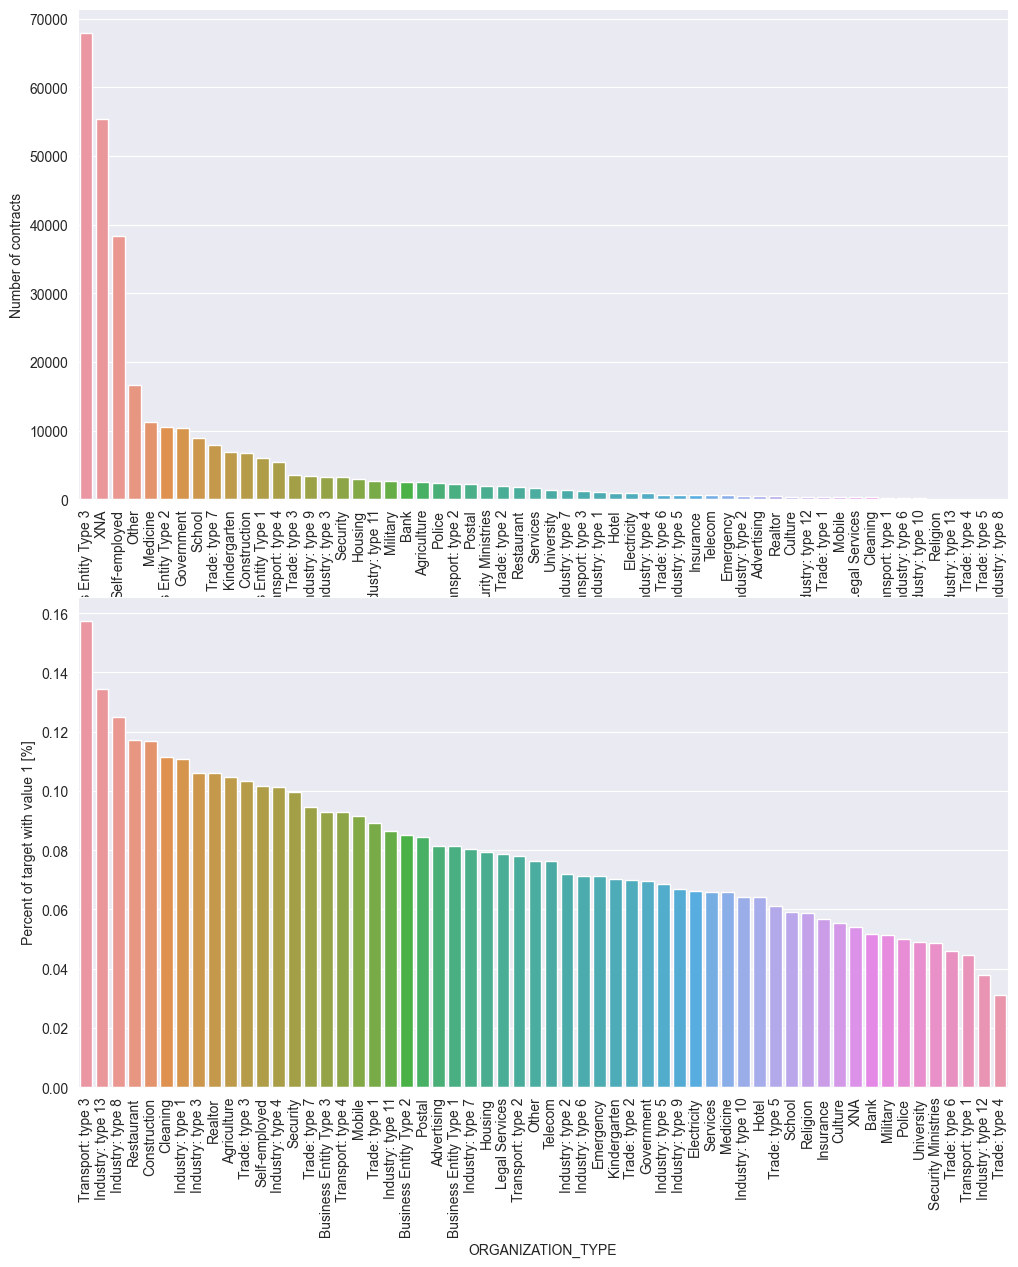

In [21]:
print("Organization type")
plot_stats(dataset_application_train, 'ORGANIZATION_TYPE',True, False)

Education type of the client


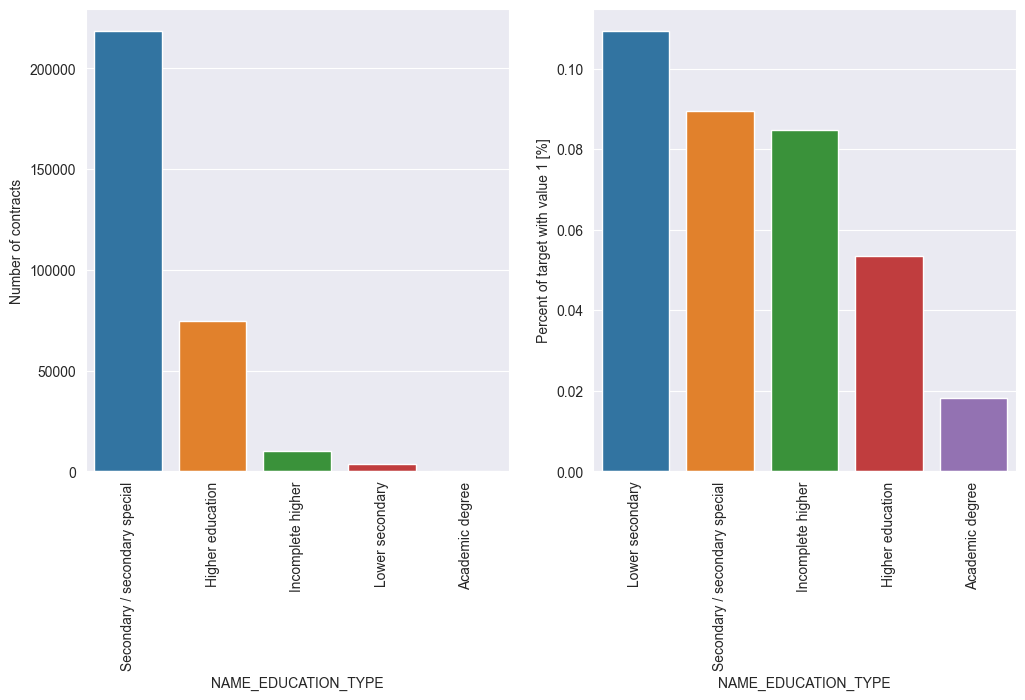

In [22]:
print("Education type of the client")
plot_stats(dataset_application_train, 'NAME_EDUCATION_TYPE',True)

Type of the housing of client


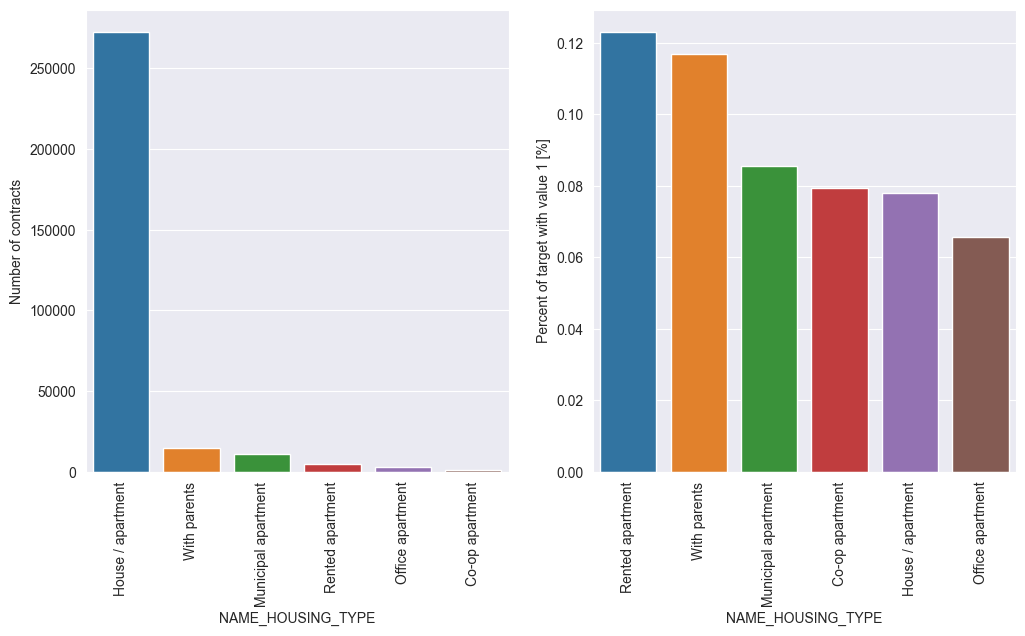

In [23]:
print("Type of the housing of client")
plot_stats(dataset_application_train, 'NAME_HOUSING_TYPE',True)

Total income distribution


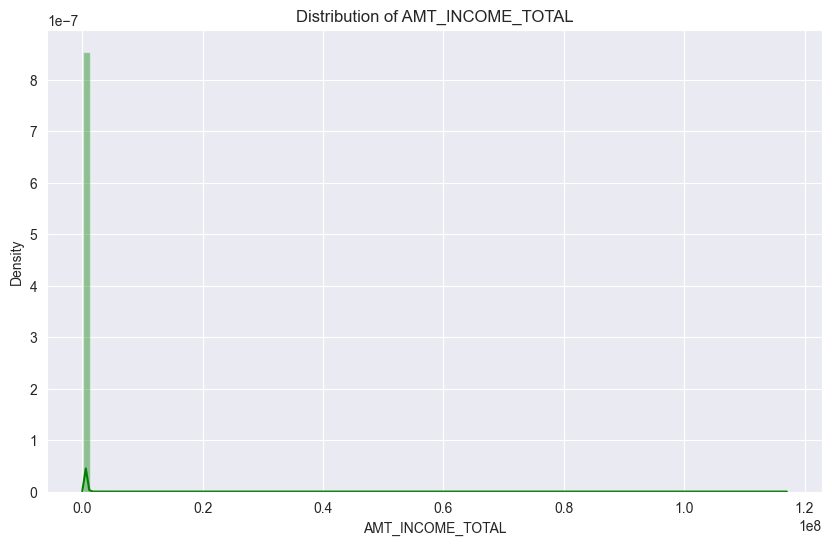

In [24]:
print("Total income distribution")
plot_distribution(dataset_application_train, 'AMT_INCOME_TOTAL','green')

Credit distribution


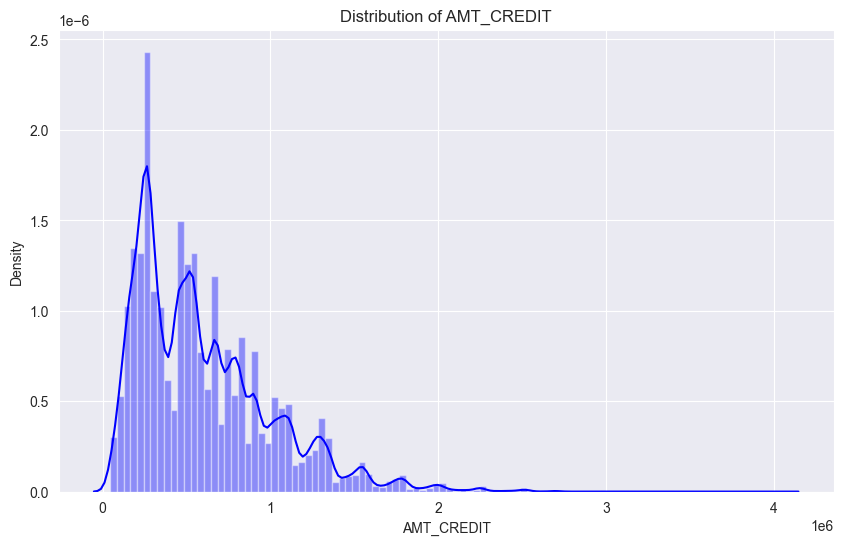

In [25]:
print("Credit distribution")
plot_distribution(dataset_application_train, 'AMT_CREDIT','blue')

Annuity distribution


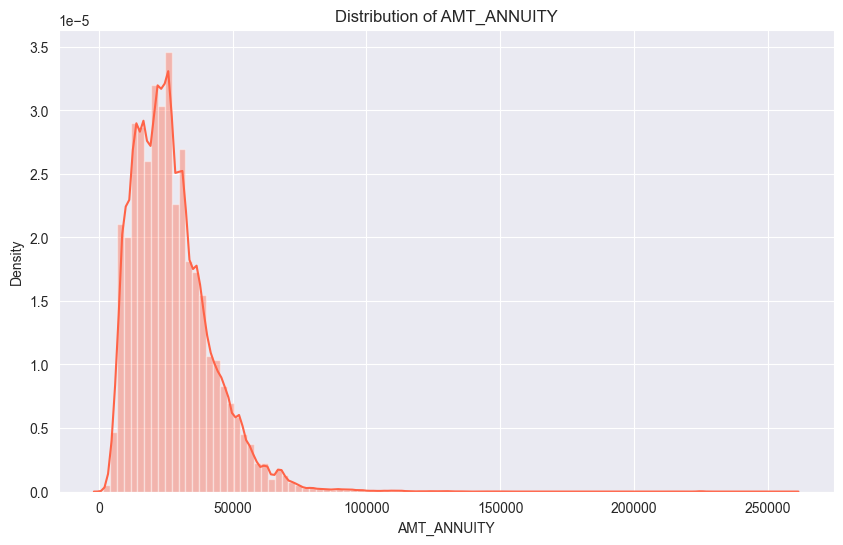

In [26]:
print("Annuity distribution")
plot_distribution(dataset_application_train, 'AMT_ANNUITY','tomato')

Goods price


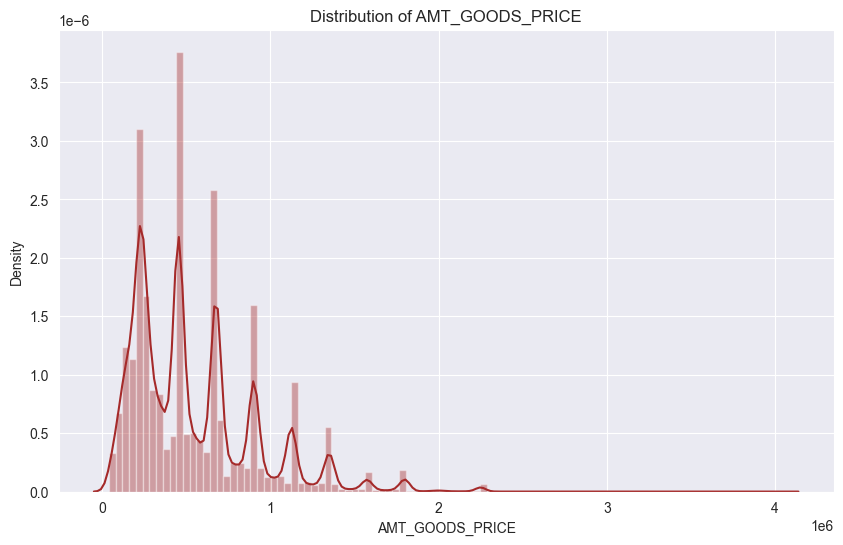

In [27]:
print("Goods price")
plot_distribution(dataset_application_train, 'AMT_GOODS_PRICE','brown')

Days from birth distribution


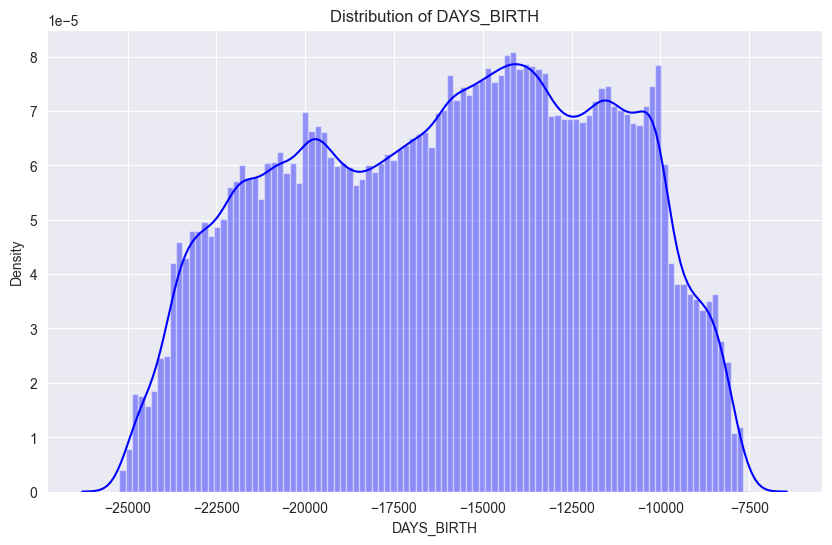

In [28]:
print("Days from birth distribution")
plot_distribution(dataset_application_train, 'DAYS_BIRTH','blue')

Days employed distribution


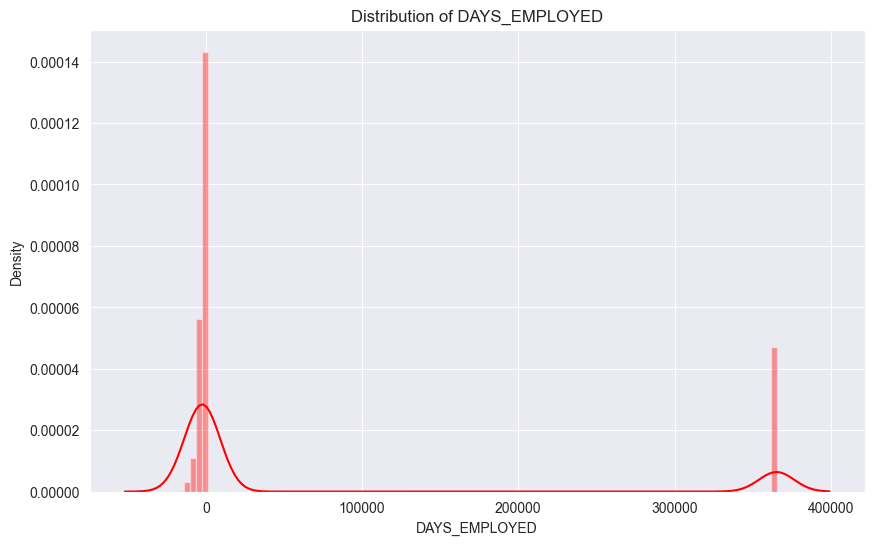

In [29]:
print("Days employed distribution")
plot_distribution(dataset_application_train, 'DAYS_EMPLOYED','red')

Days of registration distribution


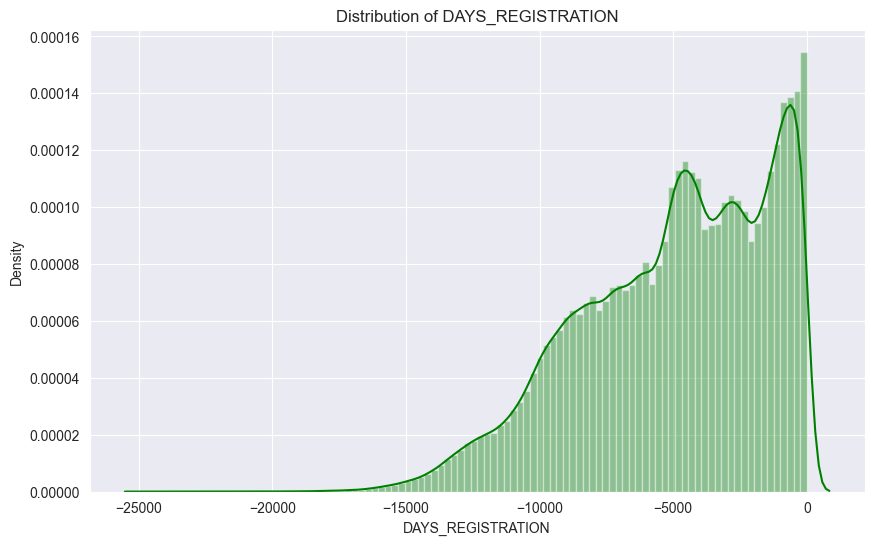

In [30]:
print("Days of registration distribution")
plot_distribution(dataset_application_train, 'DAYS_REGISTRATION','green')

Days ID publish distribution


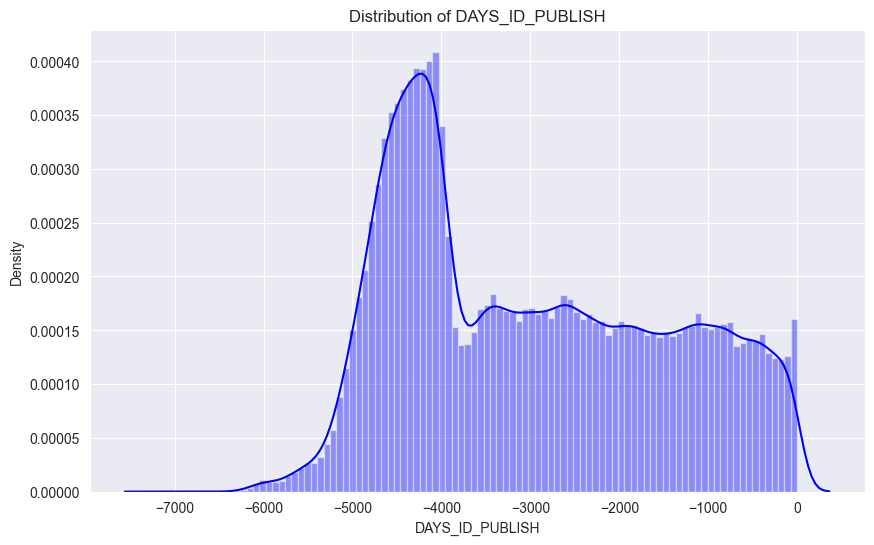

In [31]:
print("Days ID publish distribution")
plot_distribution(dataset_application_train, 'DAYS_ID_PUBLISH','blue')

Comparison of interval values with TARGET = 1 and TARGET = 0


<Figure size 640x480 with 0 Axes>

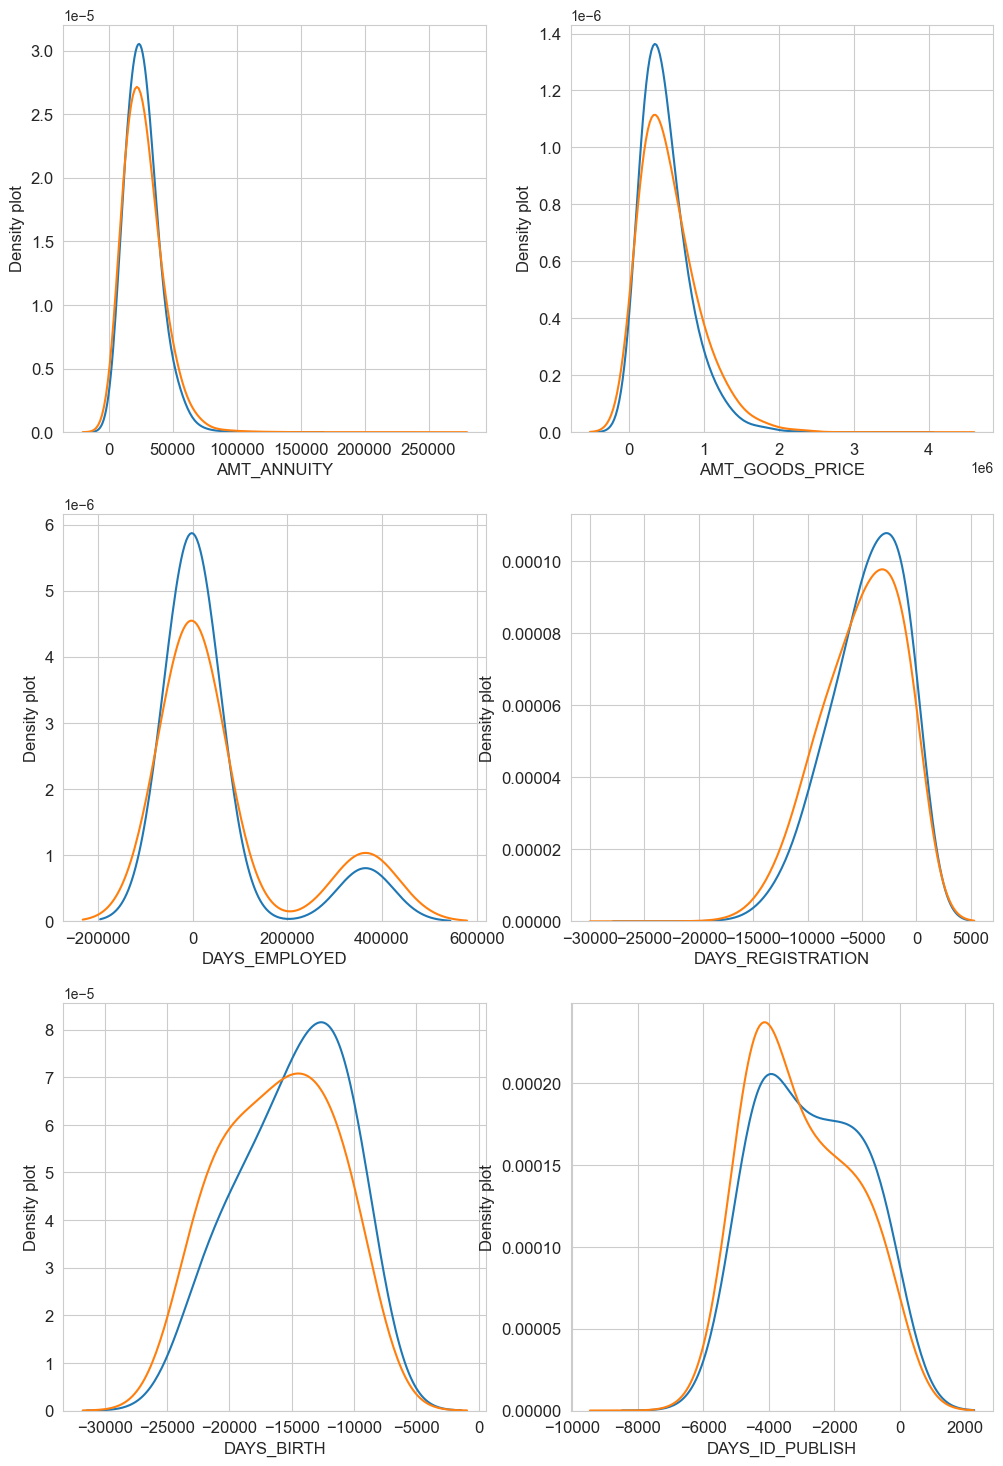

In [32]:
print("Comparison of interval values with TARGET = 1 and TARGET = 0")
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(dataset_application_train, var,nrow=3)

Region registered not live region and not work region


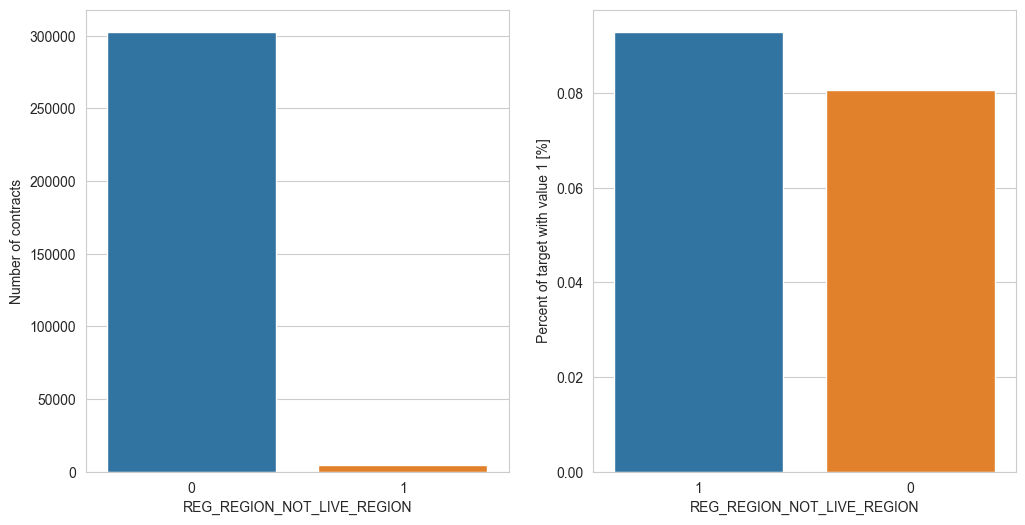

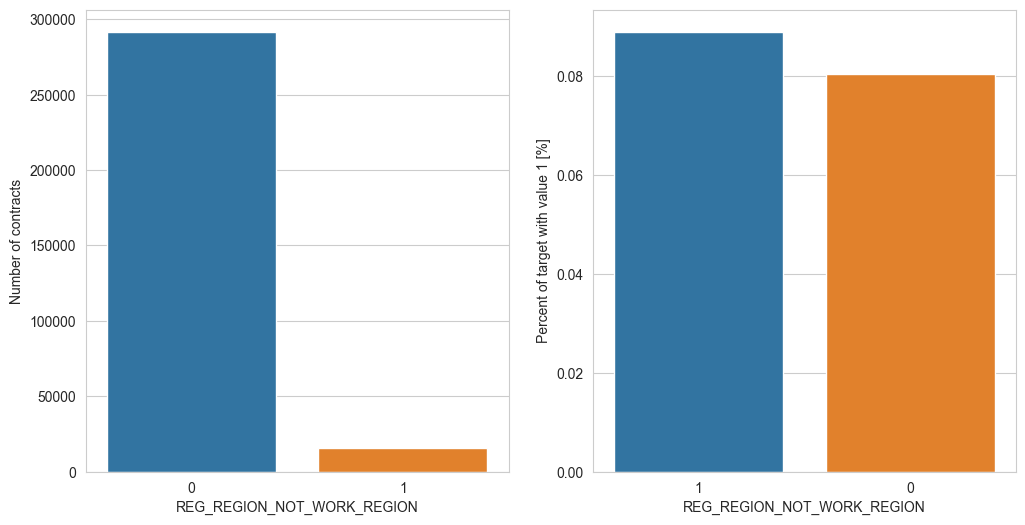

In [33]:
print("Region registered not live region and not work region")
plot_stats(dataset_application_train, 'REG_REGION_NOT_LIVE_REGION')
plot_stats(dataset_application_train, 'REG_REGION_NOT_WORK_REGION')

City registered not live city and not work city


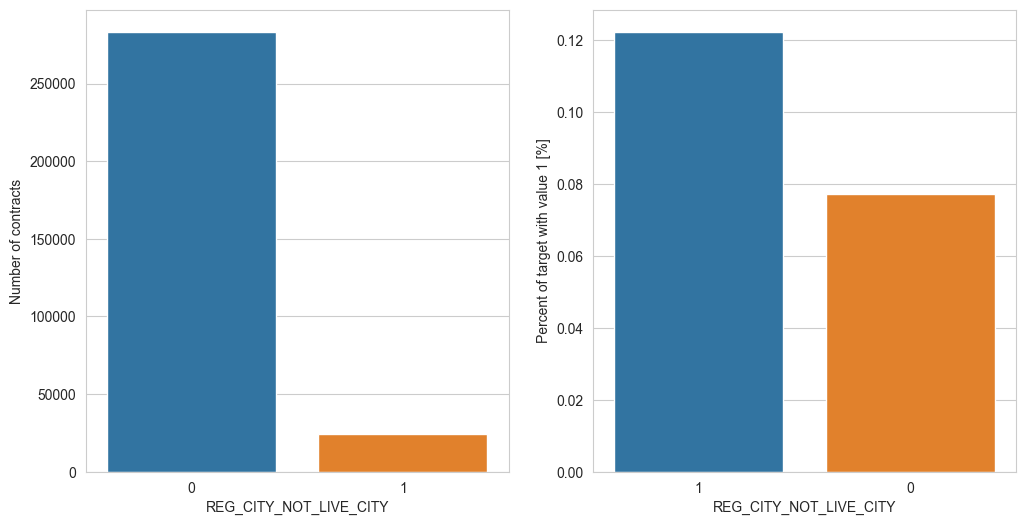

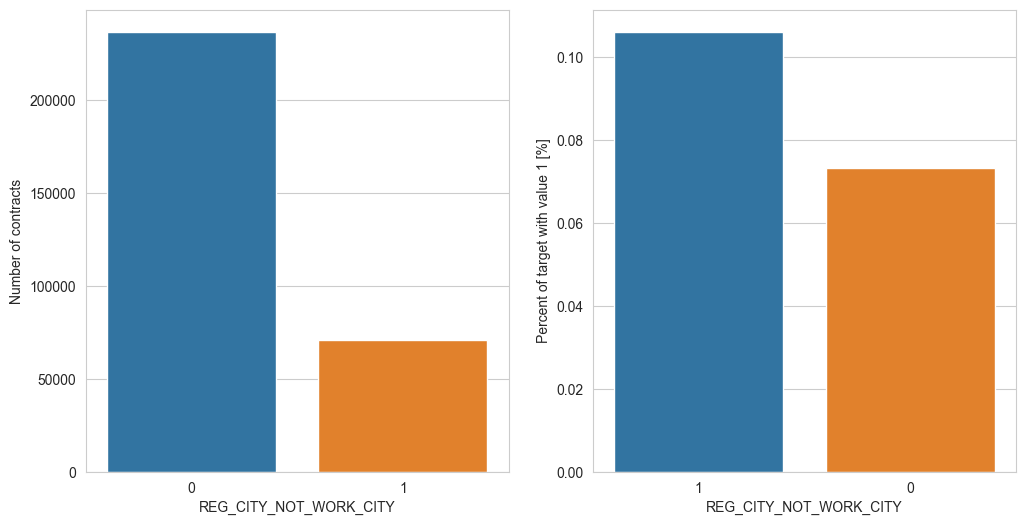

In [34]:
print("City registered not live city and not work city")
plot_stats(dataset_application_train, 'REG_CITY_NOT_LIVE_CITY')
plot_stats(dataset_application_train, 'REG_CITY_NOT_WORK_CITY')

#### 2) Bureau dataset

In [35]:
application_bureau_train = dataset_application_train.merge(dataset_bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [36]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ",
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


Credit status


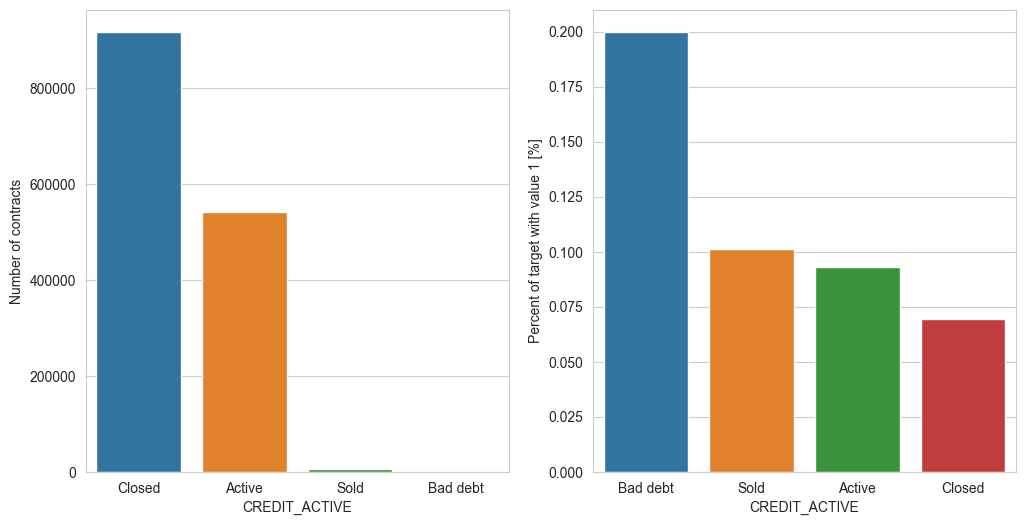

In [37]:
print("Credit status")
plot_bureau_stats(application_bureau_train, 'CREDIT_ACTIVE')

Credit currency


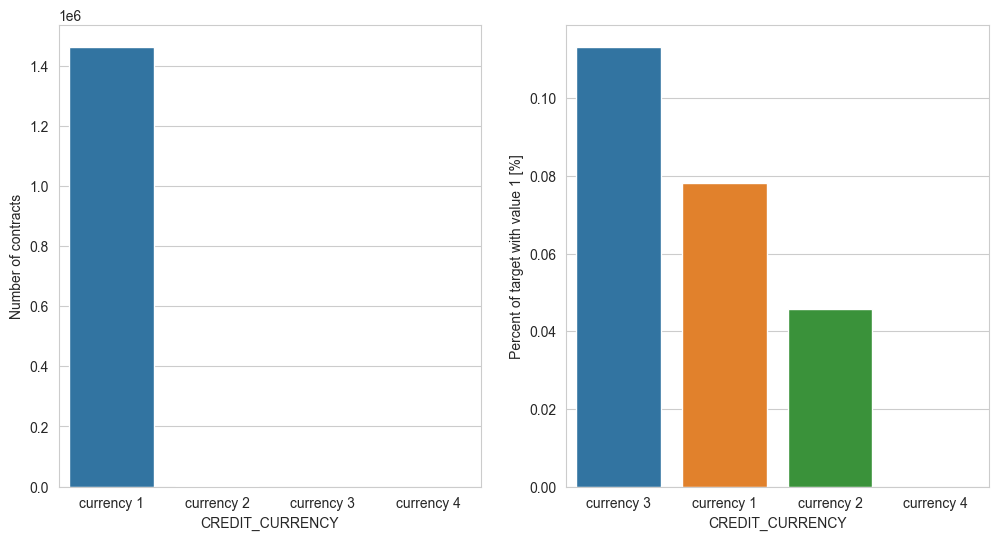

In [38]:
print("Credit currency")
plot_bureau_stats(application_bureau_train, 'CREDIT_CURRENCY')

Credit type


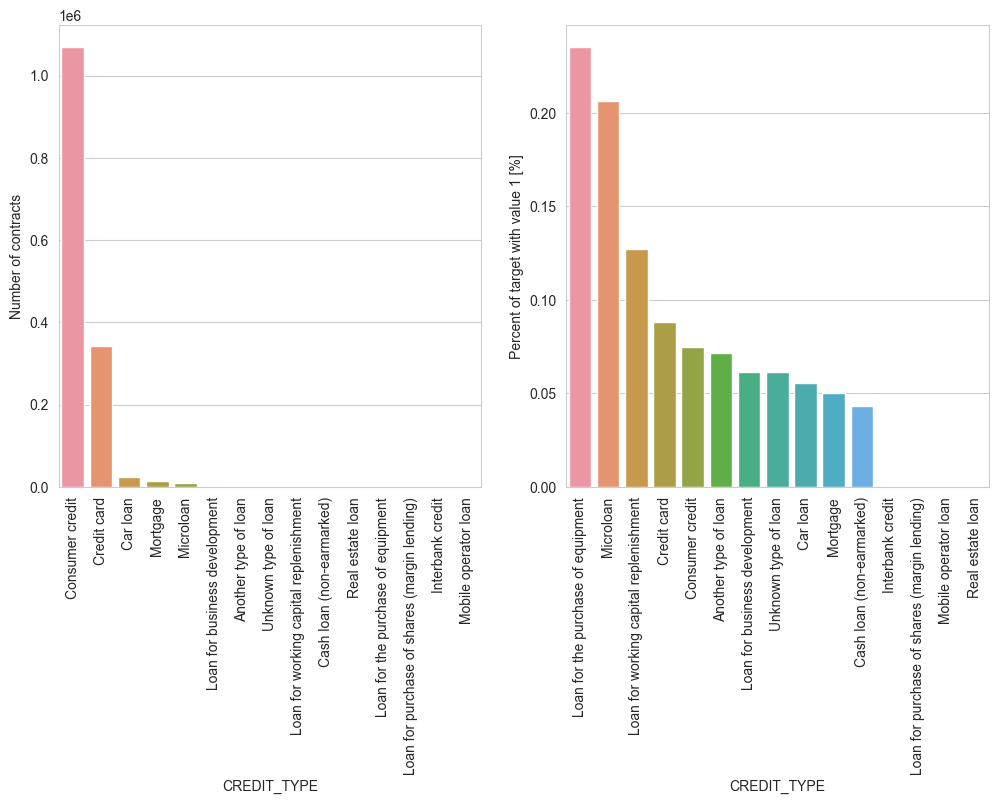

In [39]:
print("Credit type")
plot_bureau_stats(application_bureau_train, 'CREDIT_TYPE', True, True)

Duration of credit (DAYS_CREDIT)


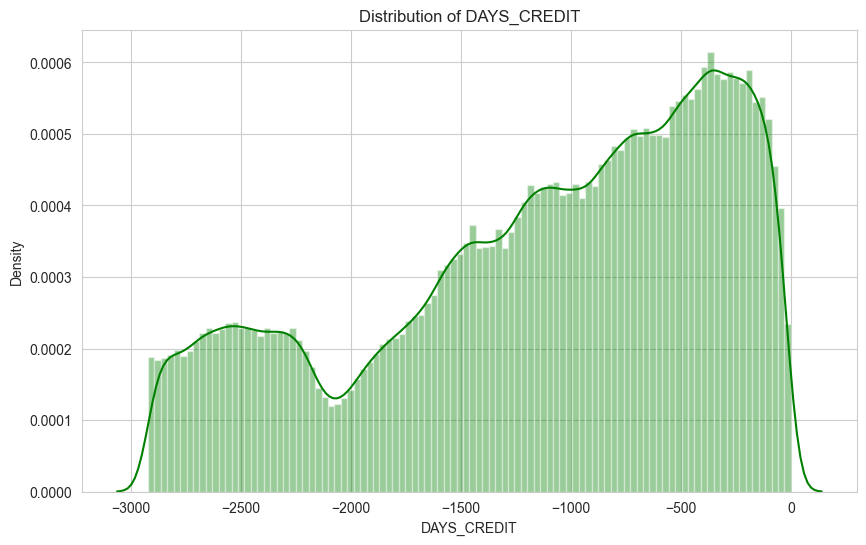

In [40]:
print("Duration of credit (DAYS_CREDIT)")
plot_bureau_distribution(application_bureau_train, 'DAYS_CREDIT','green')

Credit overdue (CREDIT_DAY_OVERDUE)


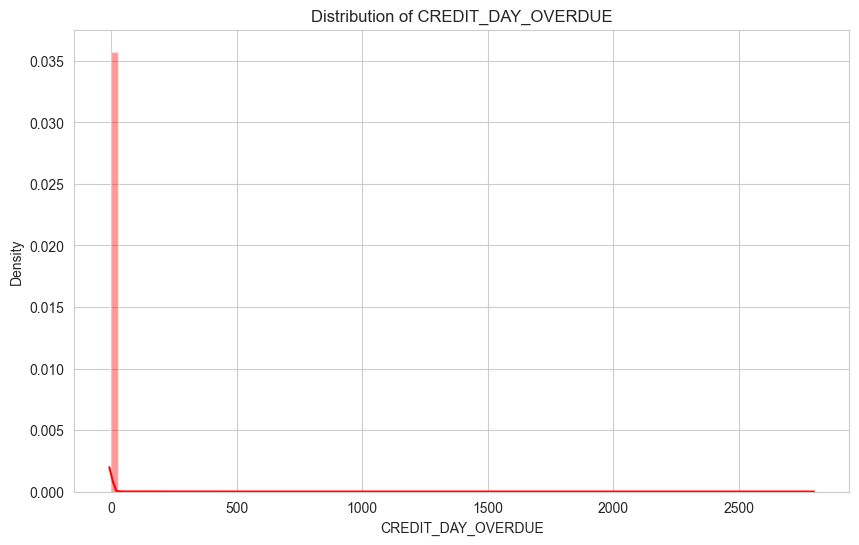

In [41]:
print("Credit overdue (CREDIT_DAY_OVERDUE)")
plot_bureau_distribution(application_bureau_train, 'CREDIT_DAY_OVERDUE','red')

Credit sum (AMT_CREDIT_SUM)


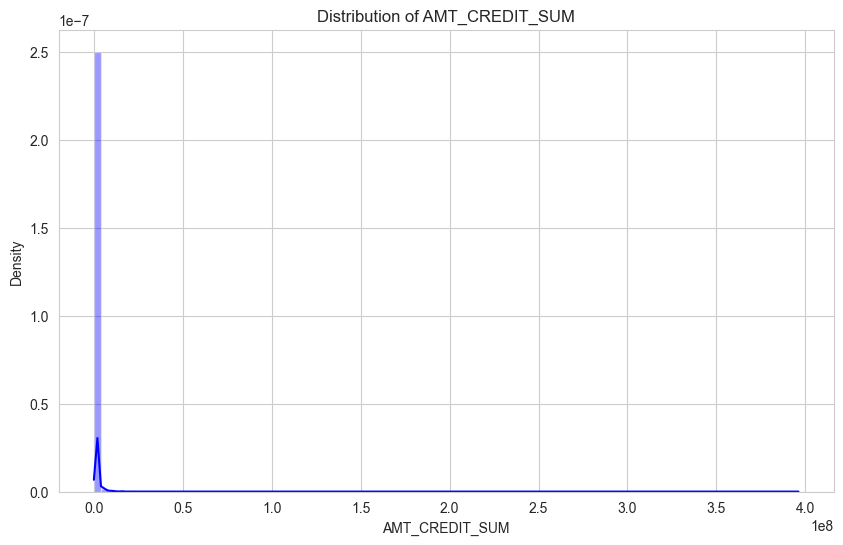

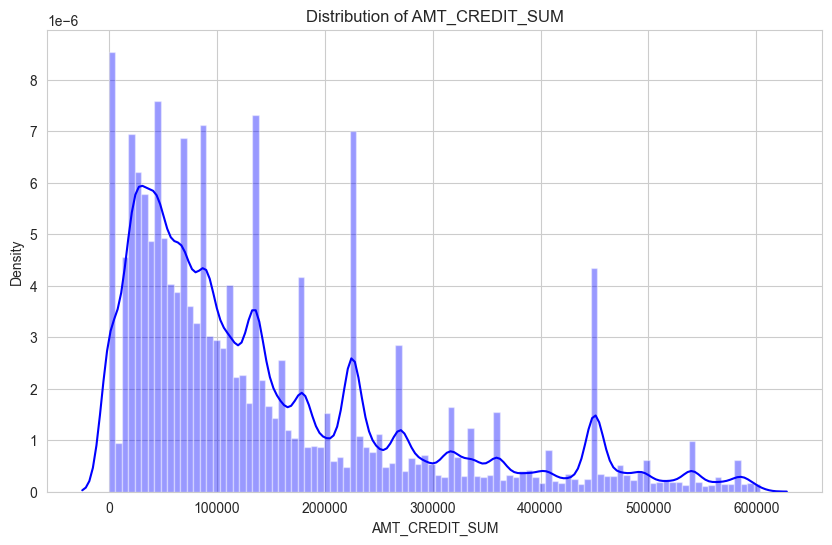

In [42]:
print("Credit sum (AMT_CREDIT_SUM)")
plot_bureau_distribution(application_bureau_train, 'AMT_CREDIT_SUM','blue')
plot_bureau_outliers_distribution(application_bureau_train, 'AMT_CREDIT_SUM','blue')

Credit sum limit (AMT_CREDIT_SUM_LIMIT)


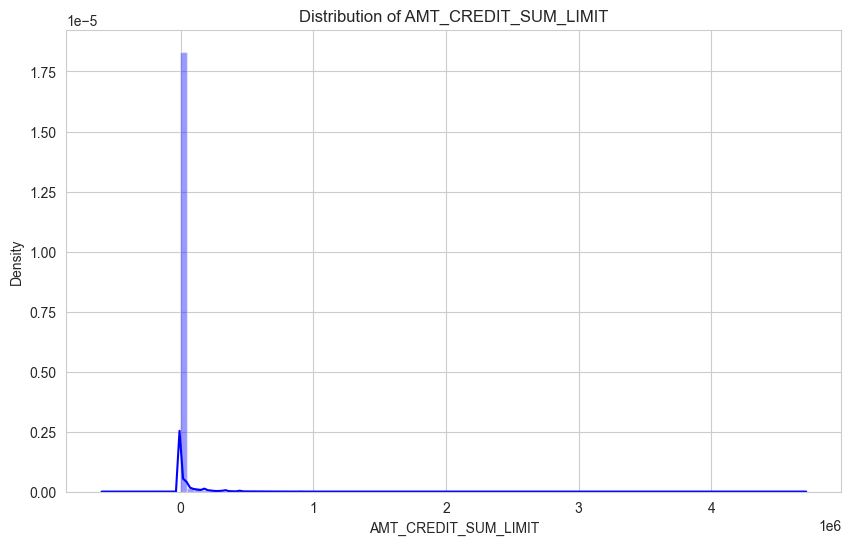

In [43]:
print("Credit sum limit (AMT_CREDIT_SUM_LIMIT)")
plot_bureau_distribution(application_bureau_train, 'AMT_CREDIT_SUM_LIMIT','blue')

Comparison of interval values with TARGET = 1 and TARGET = 0


<Figure size 640x480 with 0 Axes>

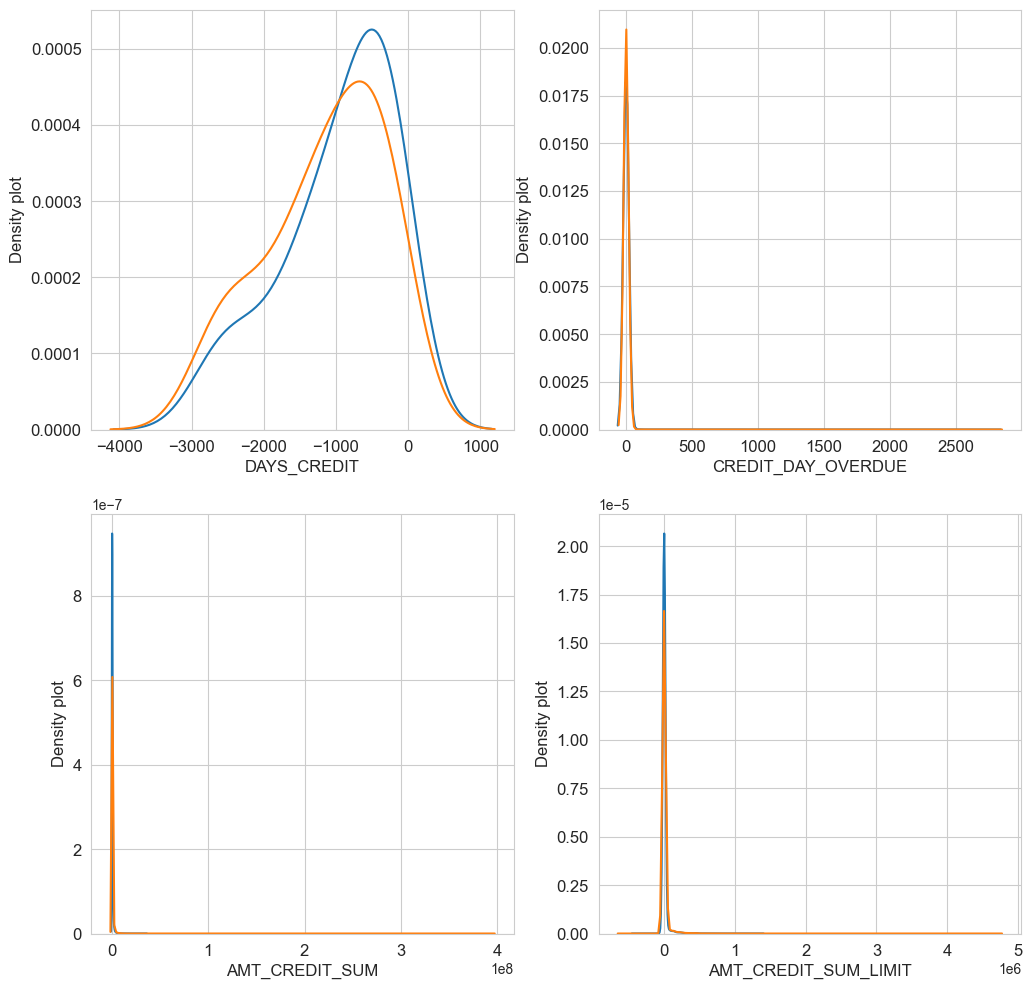

In [44]:
print("Comparison of interval values with TARGET = 1 and TARGET = 0")
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']
plot_bureau_distribution_comp(application_bureau_train, var, nrow=2)

#### 3) Previous application dataset

In [45]:
application_prev_train = dataset_application_train.merge(dataset_previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ",
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


Contract type


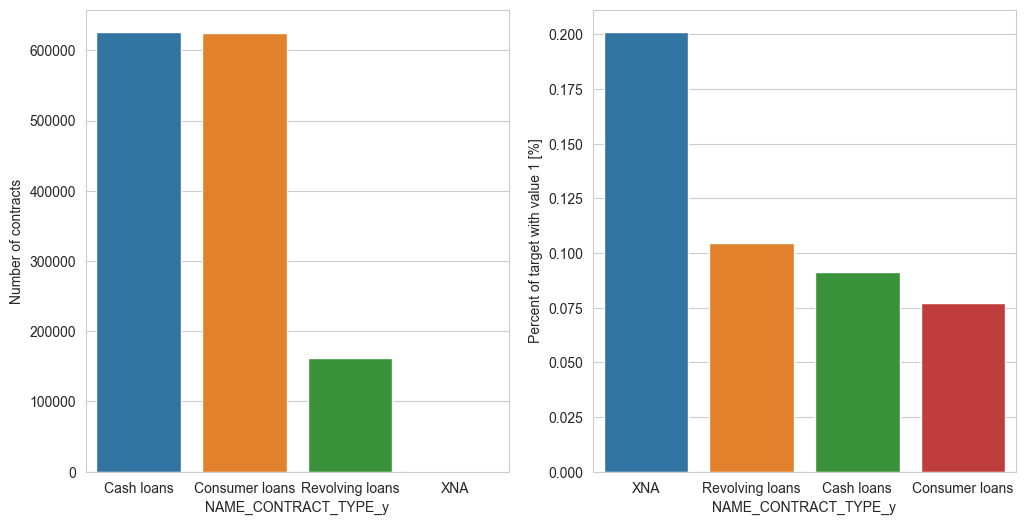

In [46]:
print("Contract type")
plot_previous_application_stats(application_prev_train, 'NAME_CONTRACT_TYPE_y')

Cash loan purpose


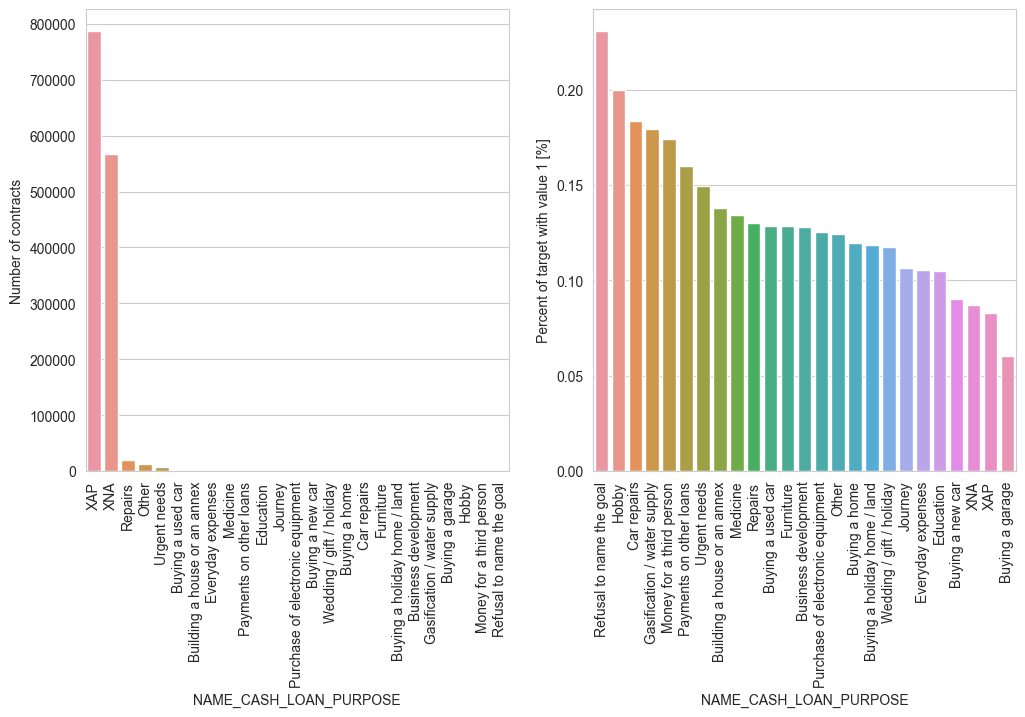

In [47]:
print("Cash loan purpose")
plot_previous_application_stats(application_prev_train, 'NAME_CASH_LOAN_PURPOSE', True, True)

Contract status


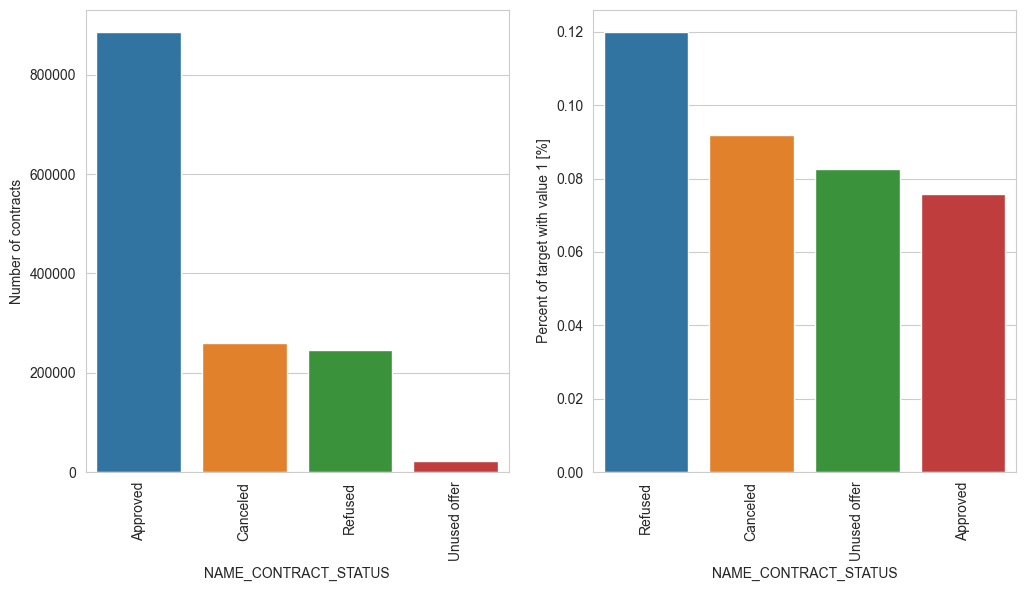

In [48]:
print("Contract status")
plot_previous_application_stats(application_prev_train, 'NAME_CONTRACT_STATUS', True, True)

Payment type


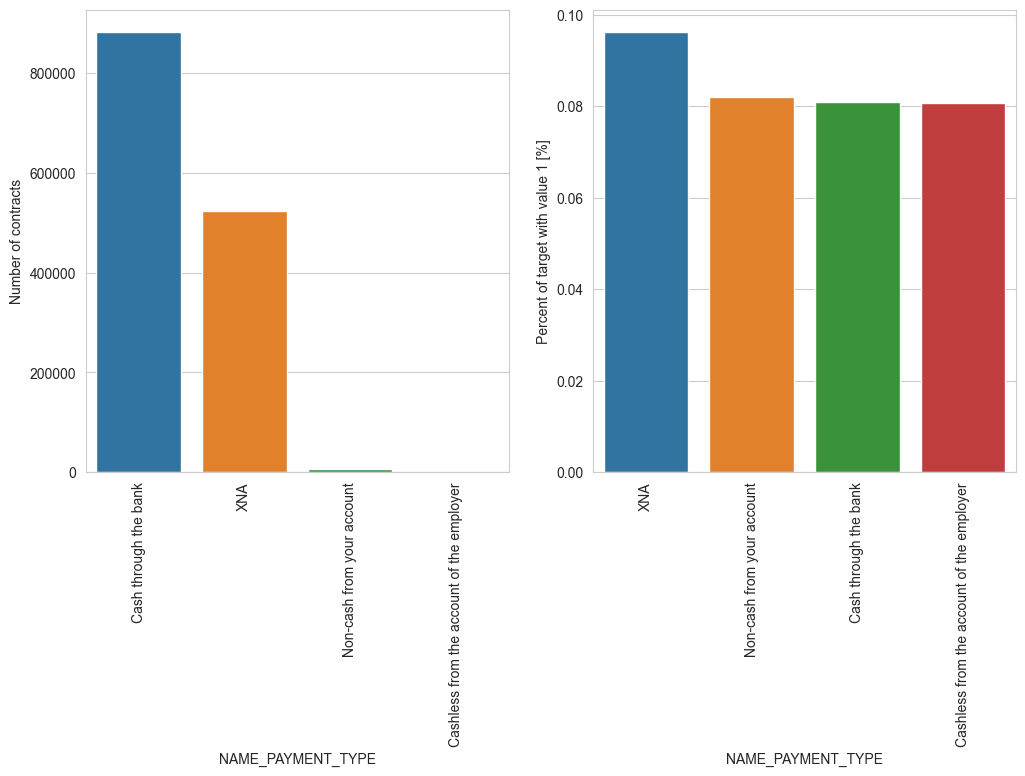

In [49]:
print("Payment type")
plot_previous_application_stats(application_prev_train, 'NAME_PAYMENT_TYPE', True, True)


Client type


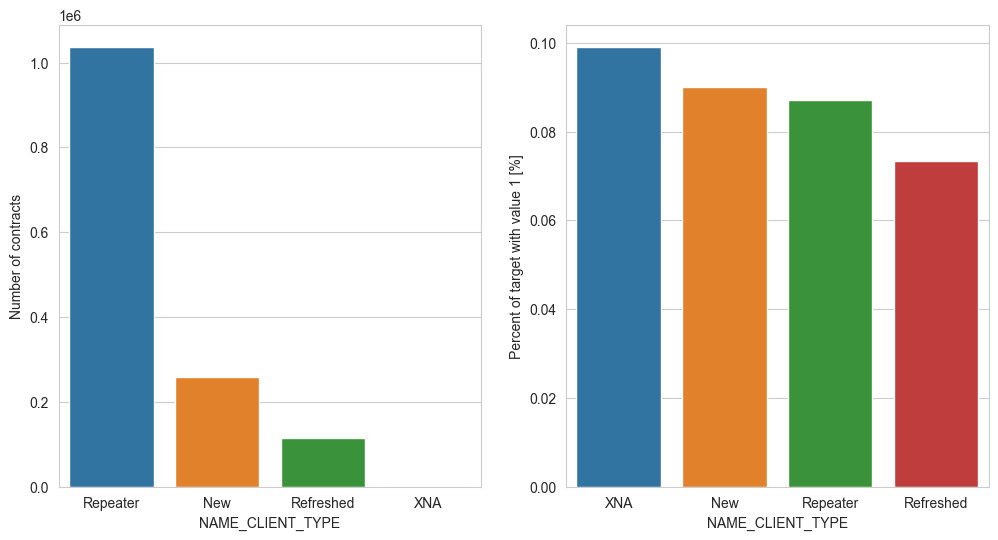

In [50]:
print("Client type")
plot_previous_application_stats(application_prev_train, 'NAME_CLIENT_TYPE')


In [51]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 330.263754 sec
computing time : 00:05:30
